In [1]:
import torch
import torch.nn.init
import torchvision
from torch.autograd import Variable
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                         shuffle=True, num_workers=10)

testset  = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=10)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


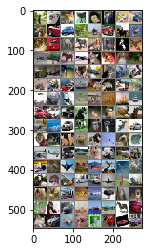

 bird  cat  cat  cat


In [18]:
import matplotlib.pylab as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(''.join('%5s' % classes[labels[j]] for j in range(4)))

In [3]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 24, 5)
        self.b1 = nn.BatchNorm2d(24)
        self.pool = nn.MaxPool2d(2,2)
        
        self.conv2 = nn.Conv2d(24, 64, 5)
        self.b2 = nn.BatchNorm2d(64)
        
        self.fc1 = nn.Linear(64 * 5 * 5, 240)
        self.fc2 = nn.Linear(240, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.b1((self.conv1(x)))))
        x = self.pool(F.relu(self.b2(self.conv2(x))))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
net

Net(
  (conv1): Conv2d(3, 24, kernel_size=(5, 5), stride=(1, 1))
  (b1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(24, 64, kernel_size=(5, 5), stride=(1, 1))
  (b2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1600, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [5]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 128 == 127:   # print every 2000 mini-batches
            print('[%d, %5d] loss : %.3f' % (epoch + 1, i+ 1, running_loss / 128))
            running_loss = 0.0
    
    correct = 0
    total = 0
    for data in testloader:
        images, labels = data
        outputs = net(Variable(images))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        
    print('Accuracy 1000 test images : %d %%'% (100 * correct/total))
    
print('Finished Training')

torch.save(net.state_dict(), 'CNN.pkl')

/Users/hyeonwoojeong/.pyenv/versions/3.5.5/envs/cs231/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


[1,   128] loss : 1.608
[1,   256] loss : 1.291
[1,   384] loss : 1.159
Accuracy 1000 test images : 53 %
[2,   128] loss : 1.062
[2,   256] loss : 0.988
[2,   384] loss : 0.952
Accuracy 1000 test images : 59 %
[3,   128] loss : 0.863
[3,   256] loss : 0.853
[3,   384] loss : 0.837
Accuracy 1000 test images : 61 %
[4,   128] loss : 0.775
[4,   256] loss : 0.762
[4,   384] loss : 0.752
Accuracy 1000 test images : 64 %
[5,   128] loss : 0.665
[5,   256] loss : 0.689
[5,   384] loss : 0.690
Accuracy 1000 test images : 65 %
[6,   128] loss : 0.615
[6,   256] loss : 0.608
[6,   384] loss : 0.605
Accuracy 1000 test images : 65 %
[7,   128] loss : 0.536
[7,   256] loss : 0.539
[7,   384] loss : 0.555
Accuracy 1000 test images : 66 %
[8,   128] loss : 0.464
[8,   256] loss : 0.485
[8,   384] loss : 0.497
Accuracy 1000 test images : 67 %
[9,   128] loss : 0.417
[9,   256] loss : 0.433
[9,   384] loss : 0.449
Accuracy 1000 test images : 67 %
[10,   128] loss : 0.354
[10,   256] loss : 0.389
[10, 

In [6]:
for data in testloader:
    images, labels = data
    #print(labels.size())
    #print(labels)
    #print(labels.size(0))

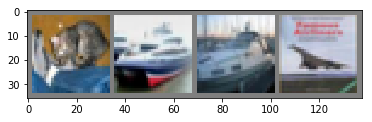

GroundTruth :    cat ship shipplane


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth : ',''.join('%5s' % classes[labels[j]] for j in range(4)))

In [15]:
outputsts = Variable(images)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat   dog   car horse


In [16]:

correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accurcay to 10000 test images : %d %%' %(100* correct / total))

Accurcay to 10000 test images : 66 %


In [17]:
class_correct = [0. for i in range(10)]
class_total = [0. for i in range(10)]

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1
        
for i in range(10):
    print('Accuray of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

RuntimeError: value cannot be converted to type uint8_t without overflow: 1000.000000